# Py-sfc_models  

`sfc_models` is a Python package for building stock-flow consistent (SFC) models.  
Author: **Brian Romanchuk**

https://github.com/brianr747/SFC_models   
https://pypi.python.org/pypi/sfc_models/   
http://www.bondeconomics.com/search?q=sfc_models   
https://github.com/brianr747/SFC_models/tree/master/sfc_models/examples/scripts  

## Models

### Model SIM

* Closed model - no imports / exports
* Pure labour - no (private) banks, firms, profit  
* Government money
* Consumers have perfect foresight with regard to their income
* Balance sheet is 
 * Households $+H$
 * Production 0
 * Government $-H$

#### Notation

| Symbol | Description |
| :------ |:--------- |   
|$C_d$ |Consumption goods demand by households, in nominal terms   |
|$C, C_s$ |Consumption goods supply by firms, in nominal terms  | 
|$G_s, G_d$ |Services supplied to and demanded by government  
|$H_d, H_h$ |Cash money held by households  
|$H_g$ |Cash money held by government  
|$N_s$ |Supply of labour    
|$N, N_d$ |Demand for labour  
|$T_d$ |Taxes demanded by government   
|$T_s, T^e_s$ |Taxes supplied or expected to be supplied  
|$W$  |Nominal wage rate   
|$WB$ |The wage bill, in nominal terms  
|$Y$ |National income, in nominal terms   
|$YD$ |Disposable income of households   
|$α$ (alpha) |Consumption parameters  
|$α_1$ |Propensity to consume out of regular income  
|$α_2$ |Propensity to consume out of past wealth  
|$θ$ (theta) |Personal income tax rate

#### Accounting (transactions) matrix for Model SIM

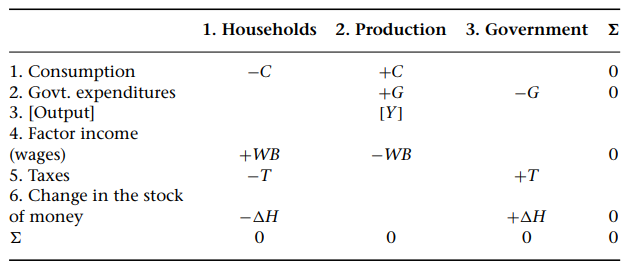

Source: Godley & Lavoie

#### Equation list for Model SIM

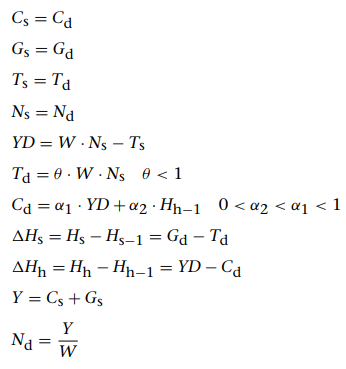

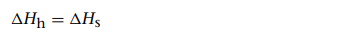

### Model SIMEX

* Replace _realized_ with _expected_ income, in the consumption function
* Recursive system

#### Equation list for Model SIMEX

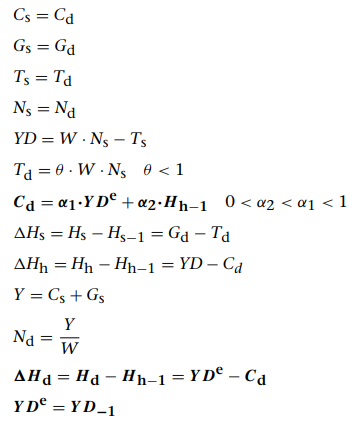

### `install sfc_models`

In [1]:
!pip install sfc_models

    100% |████████████████████████████████| 153kB 6.1MB/s ta 0:00:01
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
Cache entry deserialization failed, entry ignored


## `intro_5_04_SIMEX1.py` 

https://github.com/brianr747/SFC_models/blob/master/sfc_models/examples/scripts/intro_5_04_SIMEX1.py  
Build Model SIMEX from Godley & Lavoie (Chapter 3, section 3.7.1.)    
Copyright 2017 Brian Romanchuk   

See also:  
http://www.stephenkinsella.net/2008/01/21/ec6012-lecture-5-sim-and-simex/  

In [2]:
import os, sfc_models
from sfc_models.gl_book.chapter3 import SIMEX1, SIM
from sfc_models.examples.Quick2DPlot import Quick2DPlot

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
logfile = "sfc_models"
sfc_models.register_standard_logs('output', logfile)

### Model SIMEX

In [4]:
builder_SIMEX = SIMEX1(country_code='C1', use_book_exogenous=True)
model_SIMEX = builder_SIMEX.build_model()
print(model_SIMEX.main())

          GOV__F = GOV__LAG_F +GOV__T -GOV__DEM_GOOD                            # [F] Financial assets
   GOV__FISC_BAL = GOV__INC                                                     # [FISC_BAL] Government Fiscal Balance
        GOV__INC = GOV__T -GOV__DEM_GOOD                                        # [INC] Income (PreTax)
      GOV__LAG_F = GOV__F (k -1 )                                               # [LAG_F] Previous periods financial assets.
   GOV__PRIM_BAL = GOV__T -GOV__DEM_GOOD                                        # [PRIM_BAL] Government Primary Fiscal Balance
          GOV__T = TF__T                                                        # [T] Government Taxes
    HH__AfterTax = HH__INC -HH__T                                               # [AfterTax] Aftertax income
    HH__AlphaFin = 0.4000                                                       # [AlphaFin] Parameter for consumption out of financial assets
 HH__AlphaIncome = 0.6000                                          

In [5]:
model_SIMEX.TimeSeriesCutoff = 20

In [6]:
Y_SIMEX = model_SIMEX.GetTimeSeries('GOOD__SUP_GOOD')
time = model_SIMEX.GetTimeSeries('k')
income = model_SIMEX.GetTimeSeries('HH__AfterTax')
expected_income = model_SIMEX.GetTimeSeries('HH__EXP_AfterTax')
F_SIMEX = model_SIMEX.GetTimeSeries('HH__F')

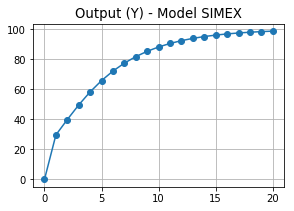

In [7]:
Quick2DPlot(time, Y_SIMEX, 'Output (Y) - Model SIMEX')

###  Model SIM

In [8]:
builder_SIM = SIM(country_code='C1', use_book_exogenous=True)
model_SIM = builder_SIM.build_model()
print(model_SIM.main())

         GOV__F = GOV__LAG_F +GOV__T -GOV__DEM_GOOD                        # [F] Financial assets
  GOV__FISC_BAL = GOV__INC                                                 # [FISC_BAL] Government Fiscal Balance
       GOV__INC = GOV__T -GOV__DEM_GOOD                                    # [INC] Income (PreTax)
     GOV__LAG_F = GOV__F (k -1 )                                           # [LAG_F] Previous periods financial assets.
  GOV__PRIM_BAL = GOV__T -GOV__DEM_GOOD                                    # [PRIM_BAL] Government Primary Fiscal Balance
         GOV__T = TF__T                                                    # [T] Government Taxes
   HH__AfterTax = HH__INC -HH__T                                           # [AfterTax] Aftertax income
   HH__AlphaFin = 0.4000                                                   # [AlphaFin] Parameter for consumption out of financial assets
HH__AlphaIncome = 0.6000                                                   # [AlphaIncome] Parameter for co

In [9]:
model_SIM.TimeSeriesCutoff = 20

In [10]:
Y_SIM = model_SIM.GetTimeSeries('GOOD__SUP_GOOD')
F_SIM = model_SIM.GetTimeSeries('HH__F')

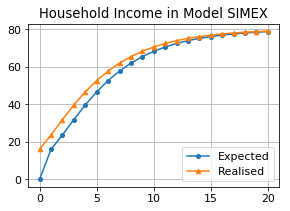

In [11]:
q = Quick2DPlot([time, time], [expected_income, income], 'Household Income in Model SIMEX', run_now=False,
                filename='SIMEX1_output.png')
q.Legend = ['Expected', 'Realised']
q.DoPlot()

### Comparison SIMEX vs SIM
#### Output

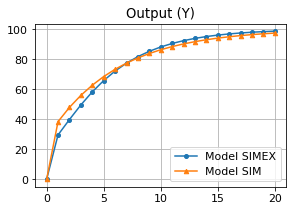

In [12]:
q = Quick2DPlot([time, time], [Y_SIMEX, Y_SIM], 'Output (Y)', run_now=False)
q.Legend = ['Model SIMEX', 'Model SIM']
q.DoPlot()

#### Household Financial Assets

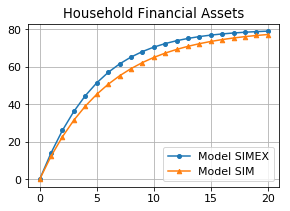

In [13]:
q = Quick2DPlot([time, time], [F_SIMEX, F_SIM], 'Household Financial Assets', run_now=False)
q.Legend = ['Model SIMEX', 'Model SIM']
q.DoPlot()